In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
import json

In [3]:
with open('x_y.model.pkl', 'rb') as f:
    x_loaded, y_loaded= pickle.load(f)



print('x', x_loaded)
print('*'*20)
print('y', y_loaded)

x       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0  0.013889           0.0   
1        1.0            0.0      0.0         0.0  0.472222           1.0   
2        1.0            0.0      0.0         0.0  0.027778           1.0   
3        1.0            0.0      0.0         0.0  0.625000           0.0   
4        0.0            0.0      0.0         0.0  0.027778           1.0   
...      ...            ...      ...         ...       ...           ...   
7038     1.0            0.0      1.0         1.0  0.333333           1.0   
7039     0.0            0.0      1.0         1.0  1.000000           1.0   
7040     0.0            0.0      1.0         1.0  0.152778           0.0   
7041     1.0            1.0      1.0         0.0  0.055556           1.0   
7042     1.0            0.0      0.0         0.0  0.916667           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0        

### Model Development

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

x_train, x_test, y_train, y_test= train_test_split(x_loaded, y_loaded, test_size= 0.2, random_state=22, stratify= y_loaded)
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [5]:
y_loaded.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [6]:
print(4139/ (4139 + 1495))  #y_train_values

print(5174 / (5174+1869))
# here perfectly fitted data not change during curtain values chanes count of y on if we random_state changed

0.7346467873624423
0.7346301292063041


In [7]:
print(y_test.value_counts())
(1035/ (1035+ 374))

Churn
0    1035
1     374
Name: count, dtype: int64


0.7345635202271115

In [8]:
dt_clf= DecisionTreeClassifier(random_state=22)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

In [9]:
# This is imbalnced data training evaluations

y_pred_train=dt_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train, y_pred_train)
print("Classificaiton report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[4139    0]
 [  13 1482]]
****************************************
Accuracy: 0.9976925807596734
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [10]:
# This is imbalnced data testing evaluations

y_pred_test=dt_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test, y_pred_test)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[855 180]
 [184 190]]
****************************************
Accuracy: 0.7416607523066004
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



In [11]:
y_loaded.value_counts()    # Thats are >> df['Churn']

Churn
0    5174
1    1869
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normal_scaler= MinMaxScaler()
array= normal_scaler.fit_transform(x_loaded)   #Scalling
x=pd.DataFrame(array, columns=x_loaded.columns)


random_oversampler= RandomOverSampler(sampling_strategy = 0.8, random_state= 22)
x_sampled, y_sampled = random_oversampler.fit_resample(x_loaded, y_loaded)
print(y_sampled.value_counts())
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_sampled, y_sampled, test_size= 0.2, random_state=22)
print(x_loaded.shape)

print(y_loaded.shape)
print('*'*20)
dt_clf_= DecisionTreeClassifier(random_state= 22)
dt_clf_.fit(x_train_, y_train_)

Churn
0    5174
1    4139
Name: count, dtype: int64
(7043, 26)
(7043,)
********************


DecisionTreeClassifier(random_state=22)

In [13]:
# This is balnced data training evaluations

y_pred_train=dt_clf_.predict(x_train_)
cnf_matrix=confusion_matrix(y_train_, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train_, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train_, y_pred_train)
print("Classificaiton report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[4147    8]
 [   9 3286]]
****************************************
Accuracy: 0.9977181208053691
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4155
           1       1.00      1.00      1.00      3295

    accuracy                           1.00      7450
   macro avg       1.00      1.00      1.00      7450
weighted avg       1.00      1.00      1.00      7450



In [14]:
# This is balnced data testing evaluations

y_pred_test=dt_clf_.predict(x_test_)
cnf_matrix=confusion_matrix(y_test_, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test_, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test_, y_pred_test)
print("classification report:\n", clf_report)

Confusion Matrix of Testing Evaltuations: 
 [[810 209]
 [ 91 753]]
****************************************
Accuracy: 0.8389694041867954
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      1019
           1       0.78      0.89      0.83       844

    accuracy                           0.84      1863
   macro avg       0.84      0.84      0.84      1863
weighted avg       0.85      0.84      0.84      1863



In [16]:
# Feature Scalling Added
from sklearn.preprocessing import StandardScaler, MinMaxScaler


normal_scaler= MinMaxScaler()
array2= normal_scaler.fit_transform(x_loaded)
x=pd.DataFrame(array2, columns= x_loaded.columns )

smote= SMOTE(sampling_strategy = 0.8, k_neighbors= 35) #Backed Run KNeighbor Algorithms
x_sampled_, y_sampled_ =smote.fit_resample(x_loaded, y_loaded)
print(y_sampled.value_counts())
print('*'*20)
x_train__, x_test__, y_train__, y_test__= train_test_split(x_sampled_, y_sampled_, test_size=0.2, random_state= 22)
print(x_loaded.shape)
print(y_loaded.shape)
print('*'*20)
dt_clf__= DecisionTreeClassifier(random_state= 22)
dt_clf__.fit(x_train__, y_train__)


print('*'* 20)


# This is balnced data training evaluations

y_pred_train=dt_clf__.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is balnced data testing evaluations

y_pred_test=dt_clf__.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

Churn
0    5174
1    4139
Name: count, dtype: int64
********************
(7043, 26)
(7043,)
********************
********************
confusion Matrix of Training Evaluations:
 [[4154    1]
 [  11 3284]]
****************************************
Accuracy: 0.9983892617449664
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4155
           1       1.00      1.00      1.00      3295

    accuracy                           1.00      7450
   macro avg       1.00      1.00      1.00      7450
weighted avg       1.00      1.00      1.00      7450

Confusion Matrix of Testing Evaltuations: 
 [[818 201]
 [219 625]]
****************************************
Accuracy: 0.7745571658615137
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1019
           1       0.76      0.74      0.75

### Hyper-Tunning

In [21]:
dt__clf= DecisionTreeClassifier(random_state= 22)
param_grid= {'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(3,6),
            'min_samples_split': np.arange(5, 10),
            'min_samples_leaf': np.arange(4, 10)}


gscv_dt_model =GridSearchCV(dt__clf, param_grid= param_grid, n_jobs= -1, verbose= 1)
gscv_dt_model.fit(x_train__, y_train__)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=22), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5]),
                         'min_samples_leaf': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([5, 6, 7, 8, 9])},
             verbose=1)

In [22]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(5), min_samples_leaf=np.int64(4),
                       min_samples_split=np.int64(5), random_state=22)

In [23]:
dt__clf= DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 4 ,min_samples_split= 5, random_state=22 )
dt__clf.fit(x_train__, y_train__)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       random_state=22)

In [24]:
# This is training evaluations

y_pred_train=dt__clf.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is testing evaluations

y_pred_test=dt__clf.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[3519  636]
 [ 901 2394]]
****************************************
Accuracy: 0.7936912751677853
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82      4155
           1       0.79      0.73      0.76      3295

    accuracy                           0.79      7450
   macro avg       0.79      0.79      0.79      7450
weighted avg       0.79      0.79      0.79      7450

Confusion Matrix of Testing Evaltuations: 
 [[848 171]
 [234 610]]
****************************************
Accuracy: 0.782608695652174
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      1019
           1       0.78      0.72      0.75       844

    accuracy                           0.78      1863
   macro avg       0.78      0.78      0.78      1863
weighted avg   

In [36]:
dt__clf__=DecisionTreeClassifier(random_state= 22)
param_grid_= {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': np.arange(3,6),
            'min_samples_split': np.arange(5, 10),
            'min_samples_leaf': np.arange(4, 10)}

rndmscv_dt_model= RandomizedSearchCV(dt__clf__,  param_grid_, n_jobs= -1, cv= 4, verbose= 1 )
rndmscv_dt_model.fit(x_train__, y_train__)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=22),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([3, 4, 5]),
                                        'min_samples_leaf': array([4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([5, 6, 7, 8, 9])},
                   verbose=1)

In [39]:
rndmscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(5), min_samples_leaf=np.int64(7),
                       min_samples_split=np.int64(8), random_state=22)

In [41]:
dt__clf___= rndmscv_dt_model.best_estimator_
dt__clf___.fit(x_train__, y_train__)



# This is training evaluations

y_pred_train=dt__clf___.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is testing evaluations

y_pred_test=dt__clf___.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[3520  635]
 [ 904 2391]]
****************************************
Accuracy: 0.7934228187919463
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82      4155
           1       0.79      0.73      0.76      3295

    accuracy                           0.79      7450
   macro avg       0.79      0.79      0.79      7450
weighted avg       0.79      0.79      0.79      7450

Confusion Matrix of Testing Evaltuations: 
 [[852 167]
 [234 610]]
****************************************
Accuracy: 0.7847557702630167
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1019
           1       0.79      0.72      0.75       844

    accuracy                           0.78      1863
   macro avg       0.78      0.78      0.78      1863
weighted avg  

In [42]:
dtclf= DecisionTreeClassifier()
dtclf.fit(x_train__, y_train__)
ccp_alpha_values= dtclf.cost_complexity_pruning_path(x_train__, y_train__)['ccp_alphas']
ccp_alpha_values.shape

(541,)

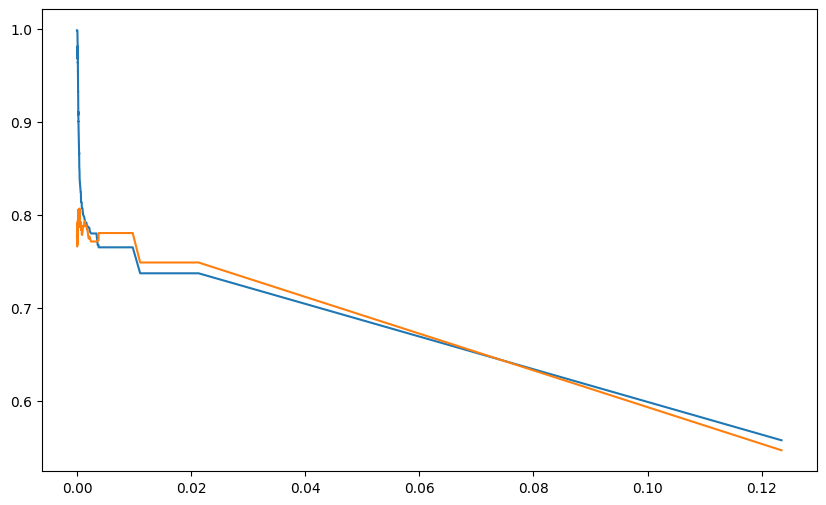

In [49]:
training_result=[]
testing_result=[]

for ccp_alpha in ccp_alpha_values:
    dt_clf_t= DecisionTreeClassifier(ccp_alpha= ccp_alpha)
    dt_clf_t.fit(x_train__, y_train__)
    training_result.append(dt_clf_t.score(x_train__, y_train__)) # Accuracy Return
    testing_result.append(dt_clf_t.score(x_test__, y_test__))


plt.figure(figsize=(10,6))
plt.plot(ccp_alpha_values, training_result)
plt.plot(ccp_alpha_values, testing_result)

In [50]:
print(max(testing_result)) # But wanted for ccp so find that values as of in index form

np.argmax(testing_result)

0.8067632850241546


np.int64(465)

In [52]:
print(training_result[465])
print(testing_result[465])
print(ccp_alpha_values[465])

0.8473825503355704
0.8067632850241546
0.00044673788275198956


In [53]:
dt_clf_f= DecisionTreeClassifier(ccp_alpha= ccp_alpha_values[465])
dt_clf_f.fit(x_train__, y_train__)



# This is training evaluations

y_pred_train=dt_clf_f.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is testing evaluations

y_pred_test=dt_clf_f.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[3627  528]
 [ 609 2686]]
****************************************
Accuracy: 0.8473825503355704
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4155
           1       0.84      0.82      0.83      3295

    accuracy                           0.85      7450
   macro avg       0.85      0.84      0.84      7450
weighted avg       0.85      0.85      0.85      7450

Confusion Matrix of Testing Evaltuations: 
 [[849 170]
 [191 653]]
****************************************
Accuracy: 0.8062265163714439
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1019
           1       0.79      0.77      0.78       844

    accuracy                           0.81      1863
   macro avg       0.80      0.80      0.80      1863
weighted avg  

#### Max Features

In [60]:
dt_clf__= DecisionTreeClassifier(max_features=8)
dt_clf__.fit(x_train__, y_train__)



# This is training evaluations

y_pred_train=dt_clf__.predict(x_train__)
cnf_matrix=confusion_matrix(y_train__, y_pred_train)
print("confusion Matrix of Training Evaluations:\n", cnf_matrix)
print("*"* 40)
accuracy=accuracy_score(y_train__, y_pred_train)
print("Accuracy:", accuracy )
print("*"*20)
clf_report=classification_report(y_train__, y_pred_train)
print("Classificaiton report:\n", clf_report)

# This is testing evaluations

y_pred_test=dt_clf__.predict(x_test__)
cnf_matrix=confusion_matrix(y_test__, y_pred_test)
print('Confusion Matrix of Testing Evaltuations: \n', cnf_matrix)

print("*"*40)
accuracy=accuracy_score(y_test__, y_pred_test)
print("Accuracy:", accuracy)
print("*"*40)

clf_report=classification_report(y_test__, y_pred_test)
print("classification report:\n", clf_report)

confusion Matrix of Training Evaluations:
 [[4154    1]
 [  11 3284]]
****************************************
Accuracy: 0.9983892617449664
********************
Classificaiton report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4155
           1       1.00      1.00      1.00      3295

    accuracy                           1.00      7450
   macro avg       1.00      1.00      1.00      7450
weighted avg       1.00      1.00      1.00      7450

Confusion Matrix of Testing Evaltuations: 
 [[830 189]
 [226 618]]
****************************************
Accuracy: 0.7772410091250671
****************************************
classification report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1019
           1       0.77      0.73      0.75       844

    accuracy                           0.78      1863
   macro avg       0.78      0.77      0.77      1863
weighted avg  

#### Lasso

In [65]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

0.05807839831469874
********************


<Axes: >

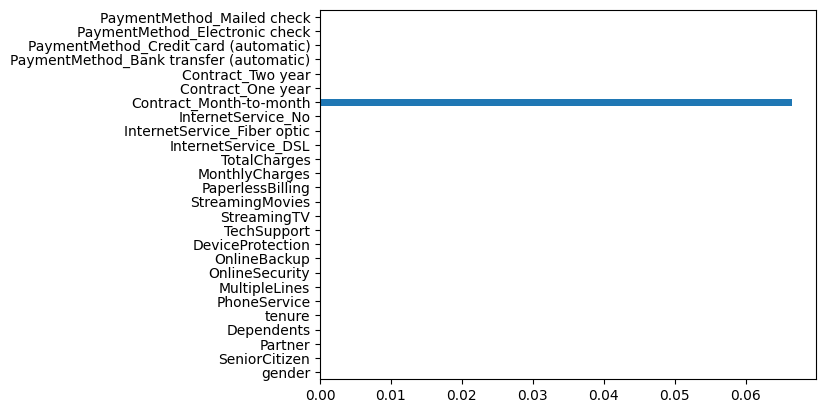

In [69]:
lasso_clf_model =Lasso(alpha= 0.1)
lasso_clf_model.fit(x_train__, y_train__)
print(lasso_clf_model.score(x_train__, y_train__))
lasso_clf_model.coef_
print('*'*20)
s1=pd.Series(lasso_clf_model.coef_, index=  x_loaded.columns)
s1.plot(kind= 'barh')

In [71]:
lasso_clf_model =Lasso(alpha= 1.0)
lasso_clf_model.fit(x_train__, y_train__)
print(lasso_clf_model.score(x_train__, y_train__))
lasso_clf_model.coef_
print('*'*20)
s1=pd.Series(lasso_clf_model.coef_, index=  x_loaded.columns)
s1.plot(kind= 'barh')

0.0
********************


<Axes: >

0.0
********************


<Axes: >

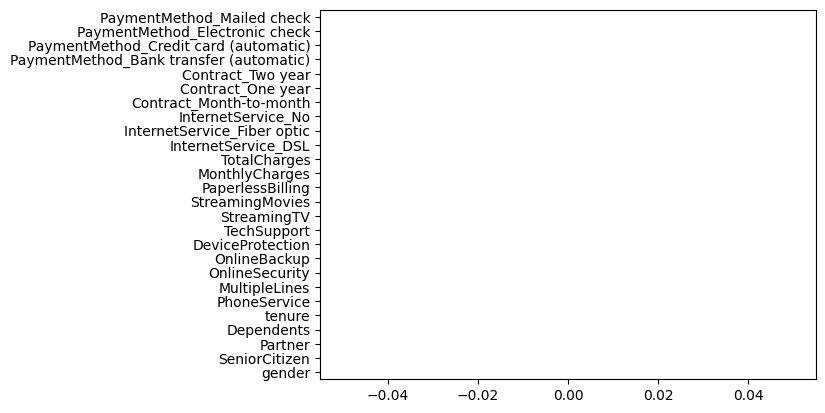

In [72]:
lasso_clf_model =Lasso(alpha= 2.0)
lasso_clf_model.fit(x_train__, y_train__)
print(lasso_clf_model.score(x_train__, y_train__))
lasso_clf_model.coef_
print('*'*20)
s1=pd.Series(lasso_clf_model.coef_, index=  x_loaded.columns)
s1.plot(kind= 'barh')

0.0
********************


<Axes: >

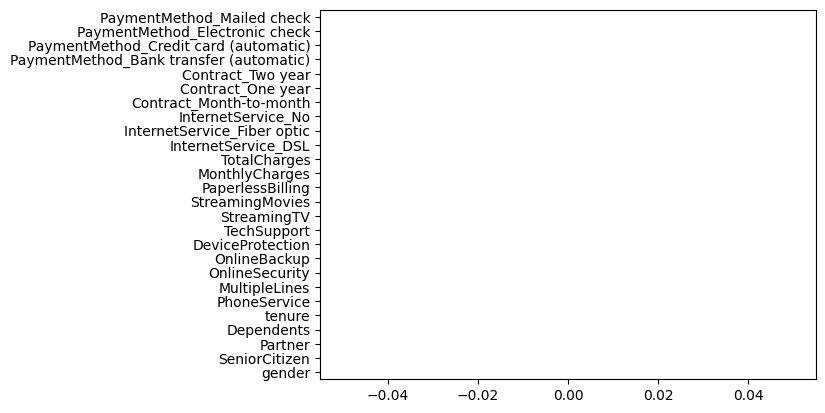

In [73]:
lasso_clf_model =Lasso(alpha= 2.4)
lasso_clf_model.fit(x_train__, y_train__)
print(lasso_clf_model.score(x_train__, y_train__))
lasso_clf_model.coef_
print('*'*20)
s1=pd.Series(lasso_clf_model.coef_, index=  x_loaded.columns)
s1.plot(kind= 'barh')

### Ridge

In [76]:
ridge_clf_model =Ridge(alpha= 2.4)
ridge_clf_model.fit(x_train__, y_train__)
print(ridge_clf_model.score(x_train__, y_train__))
ridge_clf_model.coef_



print('*'*20)
s1=pd.Series(ridge_clf_model.coef_, index=  x_loaded.columns)
s1.plot(kind= 'barh')
 #Butwanted prior accuracy alpha want to chek for ridge and lasso

0.37194350373251617
********************


<Axes: >

In [80]:
training_data_r2_values=[]
testing_data_r2_values=[]

for i in np.arange(0.1,5,0.1):
    ridge_clf_model= Ridge(alpha= i)
    ridge_clf_model.fit(x_train__, y_train__)
    train_r2=ridge_clf_model.score(x_train__, y_train__)
    test_r2=ridge_clf_model.score(x_test__, y_test__)
    training_data_r2_values.append(train_r2)
    testing_data_r2_values.append(test_r2)


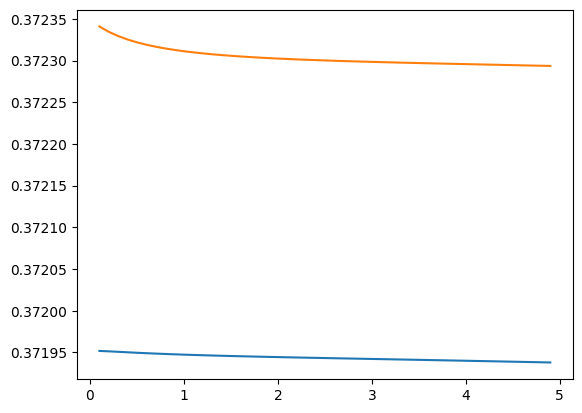

In [81]:
alpha_range=np.arange(0.1, 5, 0.1)
plt.plot(alpha_range, training_data_r2_values)
plt.plot(alpha_range, testing_data_r2_values)

### Feature Selection

In [82]:
from sklearn.feature_selection import SequentialFeatureSelector


forward_sfs= SequentialFeatureSelector(estimator= dt_clf__, n_features_to_select= 6, direction= 'forward',
                         cv= 5, n_jobs= -1)

forward_sfs.fit(x_loaded,y_loaded)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_features=8),
                          n_features_to_select=6, n_jobs=-1)

In [83]:
forward_sfs.get_feature_names_out()

array(['tenure', 'PhoneService', 'PaperlessBilling',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'], dtype=object)

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector
forward_sfs= SequentialFeatureSelector(estimator= dt_clf__,
                                      cv= 5, scoring= None,  n_jobs= -1)
forward_sfs.fit(x_train__,y_train__)
pd.DataFrame(forward_sfs.subsets_).T

feature_idx                                          cv_scores avg_score  \
1        (4,)  [0.7959731543624161, 0.7872483221476511, 0.808...  0.796242   

  feature_names  
1     (tenure,)

In [98]:
from sklearn.feature_selection import RFE

# dt_clf=DecisionTreeClassifier(random_state=22)

rfs= RFE(estimator = dt_clf__,n_features_to_select =5, verbose = 1)
rfs.fit(x_train__,y_train__)

rfs.get_feature_names_out()

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


array(['tenure', 'MonthlyCharges', 'TotalCharges',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check'],
      dtype=object)